# Post Trial

In [8]:
import pandas as pd
import seaborn as sns

# Define the relative path to the CSV file
file_path = "../../../cleaned_data/questionnaire_df.csv"

questionnaire_df = pd.read_csv(file_path)

# Filter columns that contain "PERSONAL" or "SEQ" in their names
filtered_columns = [col for col in questionnaire_df.columns if "Controller" in col or "Please answer the following questions" in col]


# Create a new dataframe with the filtered columns
filtered_df = questionnaire_df[filtered_columns]

df = filtered_df
# Remove "PERSONAL_" prefix from all column names
df.columns = [col.replace("PERSONAL_", "") for col in df.columns]

# Replace "Chiron" with "SBC" in the "controller" column
df['Controller being tested?'] = df['Controller being tested?'].replace("Chiron", "SBC")

df.to_csv("post_trial_raw.csv")

# Display the new dataframe
df.head()

<ipython-input-8-b8197b40d0e8>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Controller being tested?'] = df['Controller being tested?'].replace("Chiron", "SBC")


,Controller being tested?,SIM-WITH-VR_Please answer the following questions [I feel I could perceive the depth of the objects well],SIM-WITH-VR_Please answer the following questions [I felt as though the robot's movements were my own.],SIM-WITH-VR_Please answer the following questions [I feel like it was an immersive experience],SIM-WITH-VR_Please answer the following questions [I feel like the simulation training was enough for me to understand how to use the system],SIM-NO-VR_Please answer the following questions [I feel I could perceive the depth of the objects well].1,SIM-NO-VR_Please answer the following questions [I felt as though the robot's movements were my own.].1,SIM-NO-VR_Please answer the following questions [I feel like it was an immersive experience].1,SIM-NO-VR_Please answer the following questions [I feel like the simulation training was enough for me to understand how to use the system].1,RW-WITH-VR_Please answer the following questions [I feel I could rotate well the base of the robot the way I wanted to ],...,RW-NO-VR_Please answer the following questions [I feel I could move the base at the same time I moved the robot's arm to accomplish the task].1,RW-NO-VR_Please answer the following questions [I feel I could perceive the depth of the objects well].3,RW-NO-VR_Please answer the following questions [I do not feel sick after using this visual interface].1,RW-NO-VR_Please answer the following questions [I feel I did not need to move myself too much to accomplish the task].1,RW-NO-VR_Please answer the following questions [I feel that my arm is sore from the teleoperation].1,RW-NO-VR_Please answer the following questions [I feel like it took me a lot of time to move the robot's base from A to B].1,RW-NO-VR_Please answer the following questions [I feel like I improved my performance considerably over the runs].1,"RW-NO-VR_Please answer the following questions [I feel like with more training, I would feel less tired].1",RW-NO-VR_Please answer the following questions [I felt as though the robot's movements were my own.].3,RW-NO-VR_Please answer the following questions [I feel like it was an immersive experience].3
0,SBC,Slightly Agree,Slightly Agree,Slightly Agree,Strongly Agree,Strongly Disagree,Slightly Agree,Neither Agree not Disagree,Slightly Agree,Strongly Agree,...,Slightly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Disagree,Slightly Agree,Slightly Agree,Neither Agree not Disagree,Slightly Agree
1,SBC,Strongly Disagree,Slightly Disagree,Slightly Disagree,Strongly Disagree,Slightly Agree,Slightly Disagree,Neither Agree not Disagree,Slightly Disagree,Strongly Agree,...,Neither Agree not Disagree,Slightly Disagree,Neither Agree not Disagree,Strongly Agree,Neither Agree not Disagree,Slightly Agree,Strongly Agree,Slightly Agree,Slightly Disagree,Neither Agree not Disagree
2,SBC,Slightly Disagree,Slightly Disagree,Strongly Agree,Slightly Agree,Slightly Disagree,Strongly Disagree,Slightly Disagree,Neither Agree not Disagree,Strongly Agree,...,Strongly Agree,Slightly Agree,Strongly Agree,Slightly Agree,Strongly Disagree,Strongly Disagree,Slightly Disagree,Strongly Agree,Slightly Agree,Strongly Agree
3,SBC,Neither Agree not Disagree,Slightly Disagree,Slightly Agree,Slightly Disagree,Slightly Disagree,Neither Agree not Disagree,Slightly Disagree,Slightly Agree,Slightly Agree,...,Strongly Agree,Neither Agree not Disagree,Strongly Agree,Strongly Agree,Slightly Disagree,Strongly Disagree,Neither Agree not Disagree,Slightly Agree,Slightly Disagree,Slightly Agree
4,SBC,Slightly Disagree,Neither Agree not Disagree,Slightly Agree,Slightly Agree,Slightly Agree,Slightly Disagree,Slightly Disagree,Slightly Agree,Strongly Agree,...,Slightly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Slightly Agree,Strongly Disagree,Strongly Agree,Slightly Disagree,Slightly Agree,Strongly Agree


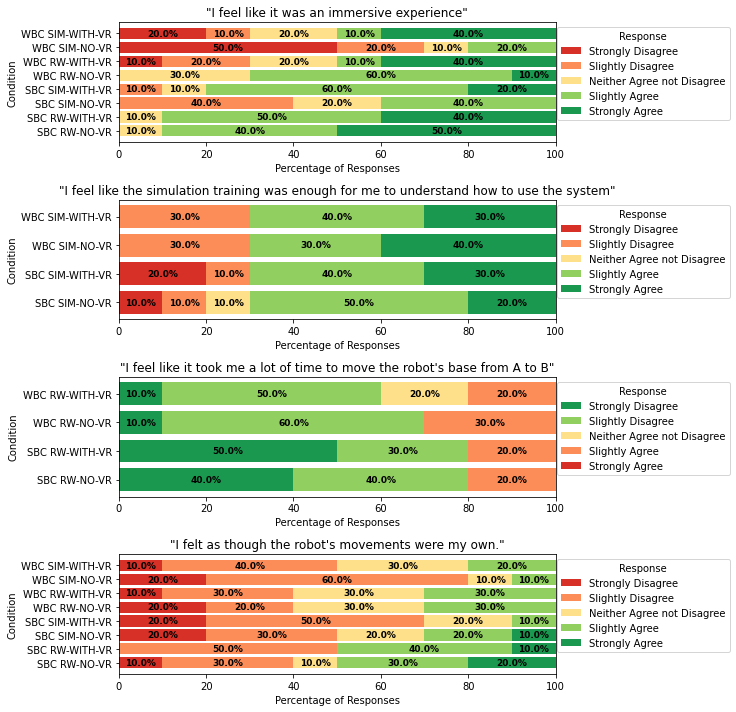

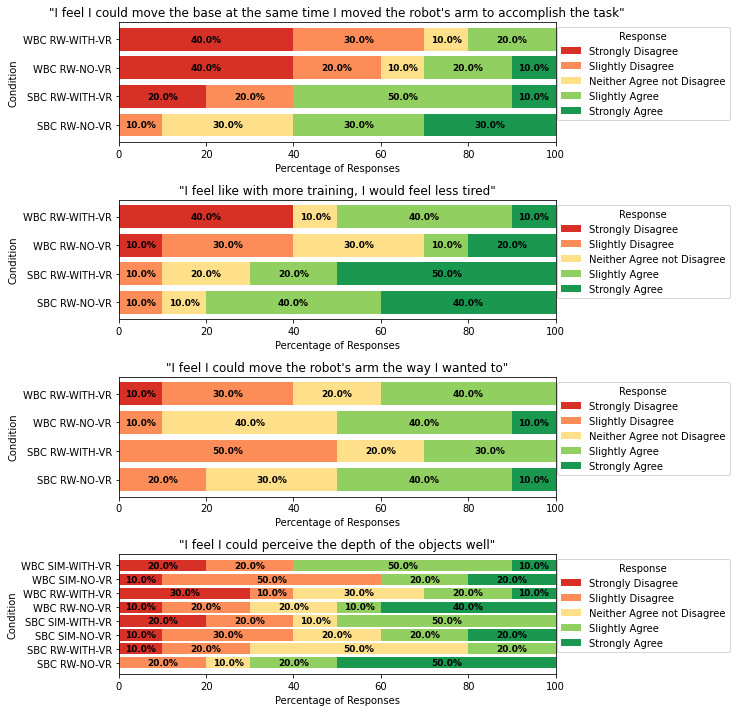

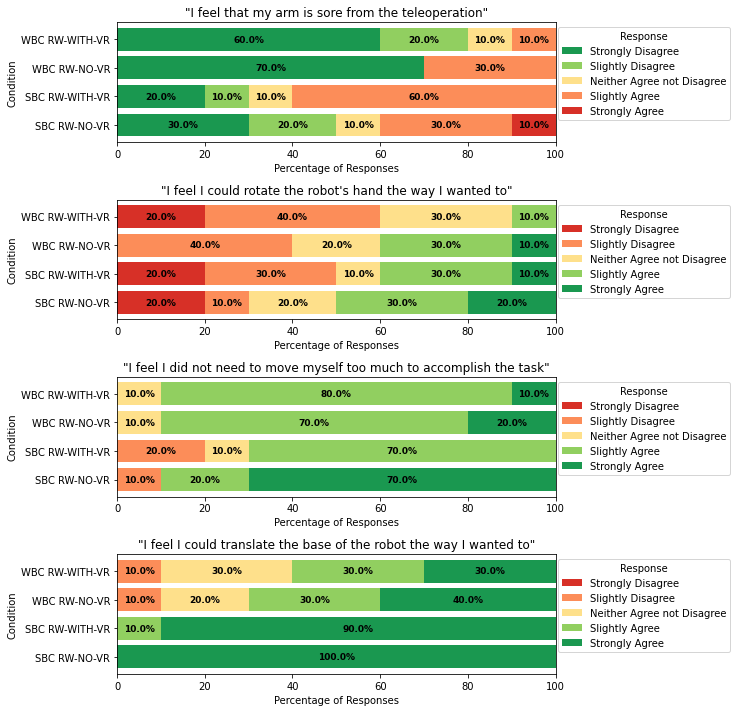

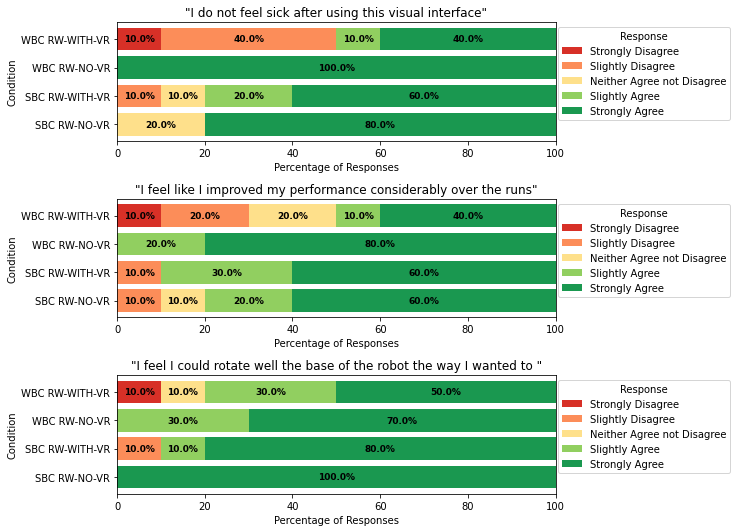

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Extract questions from column names
question_columns = [col for col in df.columns if any(prefix in col for prefix in ["RW-WITH-VR", "RW-NO-VR", "SIM-WITH-VR", "SIM-NO-VR"])]
questions = list(set([col.split("[")[1].split("]")[0] for col in question_columns]))

# Define response order for the Likert scale
likert_order = [
    "Strongly Disagree", "Slightly Disagree", "Neither Agree not Disagree",
    "Slightly Agree", "Strongly Agree"
]

# Define questions that need reversed color palette
reversed_questions = [
    "I feel like it took me a lot of time to move the robot's base from A to B",
    "I feel that my arm is sore from the teleoperation"
]

# Define color palettes
default_palette = {
    "Strongly Disagree": "#D73027",
    "Slightly Disagree": "#FC8D59",
    "Neither Agree not Disagree": "#FEE08B",
    "Slightly Agree": "#91CF60",
    "Strongly Agree": "#1A9850"
}

reversed_palette = {
    "Strongly Disagree": "#1A9850",
    "Slightly Disagree": "#91CF60",
    "Neither Agree not Disagree": "#FEE08B",
    "Slightly Agree": "#FC8D59",
    "Strongly Agree": "#D73027"
}
# Group questions into sets of 3
question_groups = [questions[i:i+4] for i in range(0, len(questions), 4)]

# Process each group of questions for visualization
for group_idx, question_group in enumerate(question_groups):
    fig, axes = plt.subplots(len(question_group), 1, figsize=(11.5, 2.5 * len(question_group)))
    
    if len(question_group) == 1:
        axes = [axes]
    
    for ax, question in zip(axes, question_group):
        
        # Extract relevant columns
        relevant_cols = [col for col in df.columns if question in col]
        filtered_df = df[["Controller being tested?"] + relevant_cols]
        
        # Melt dataframe for easier plotting
        melted_df = filtered_df.melt(id_vars=["Controller being tested?"], var_name="Condition", value_name="Response")
        
        # Map conditions to the six possible categories
        def classify_condition(row):
            controller = row["Controller being tested?"]
            condition = row["Condition"]
            if "RW-WITH-VR" in condition and "WBC" in controller:
                return "WBC RW-WITH-VR"
            elif "RW-NO-VR" in condition and "WBC" in controller:
                return "WBC RW-NO-VR"
            elif "RW-WITH-VR" in condition and "SBC" in controller:
                return "SBC RW-WITH-VR"
            elif "RW-NO-VR" in condition and "SBC" in controller:
                return "SBC RW-NO-VR"
            elif "SIM-WITH-VR" in condition and "WBC" in controller:
                return "WBC SIM-WITH-VR"
            elif "SIM-NO-VR" in condition and "WBC" in controller:
                return "WBC SIM-NO-VR"
            elif "SIM-WITH-VR" in condition and "SBC" in controller:
                return "SBC SIM-WITH-VR"
            elif "SIM-NO-VR" in condition and "SBC" in controller:
                return "SBC SIM-NO-VR"
            return None
        
        melted_df["Condition"] = melted_df.apply(classify_condition, axis=1)
        melted_df = melted_df.dropna()
        
        # Count responses for each question and condition, then normalize to percentage
        response_counts = melted_df.groupby(["Condition", "Response"]).size().reset_index(name="Count")
        response_counts["Percentage"] = response_counts.groupby(["Condition"])["Count"].transform(lambda x: x / x.sum() * 100)
        
        # Pivot data for stacked bar chart format
        stacked_data = response_counts.pivot(index="Condition", columns="Response", values="Percentage").fillna(0)
        stacked_data = stacked_data.reindex(columns=likert_order, fill_value=0)
        
        # Determine color palette to use
        likert_palette = reversed_palette if question in reversed_questions else default_palette
        
        # Initialize left position for stacking bars
        left = [0] * len(stacked_data)
        
        # Plot each response category as a stacked bar
        for response in likert_order:
            if response in stacked_data.columns:
                bars = ax.barh(stacked_data.index, stacked_data[response], color=likert_palette[response], label=response, left=left)
                left += stacked_data[response]  # Shift left position for next category
                
                # Add percentage text on each colored segment
                for bar, percentage in zip(bars, stacked_data[response]):
                    if percentage > 0:
                        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, f"{percentage:.1f}%", 
                                ha="center", va="center", fontsize=9, color="black", fontweight="bold")
        
        ax.set_xlim(0, 100)
        ax.set_xlabel("Percentage of Responses")
        ax.set_ylabel("Condition")
        ax.set_title(f'"{question}"')
        ax.legend(title="Response", loc="upper right", bbox_to_anchor=(1.41, 1))
    
    plt.tight_layout()
    plt.savefig(f'question_group_{group_idx + 1}.pdf', format='pdf')
    plt.show()


KeyError: 'Neither Agree not Disagree'

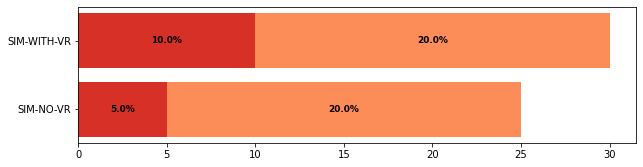

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Define the specific question to plot
specific_question = "I feel like the simulation training was enough for me to understand how to use the system"

# Define response order for the Likert scale
likert_order = [
    "Strongly Disagree", "Slightly Disagree", "Neither Agree not Disagree",
    "Slightly Agree", "Strongly Agree"
]

# Define color palette
default_palette = {
    "Strongly Disagree": "#D73027",
    "Slightly Disagree": "#FC8D59",
    "Neutral": "#FEE08B",
    "Slightly Agree": "#91CF60",
    "Strongly Agree": "#1A9850"
}

# Extract relevant columns
relevant_cols = [col for col in df.columns if specific_question in col]
filtered_df = df[["Controller being tested?"] + relevant_cols]

# Melt dataframe for easier plotting
melted_df = filtered_df.melt(id_vars=["Controller being tested?"], var_name="Condition", value_name="Response")

# Map conditions to the four possible categories
def classify_condition(row):
    controller = row["Controller being tested?"]
    condition = row["Condition"]
    if "SIM-WITH-VR" in condition:
        return "SIM-WITH-VR"
    elif "SIM-NO-VR" in condition:
        return "SIM-NO-VR"
    return None

melted_df["Condition"] = melted_df.apply(classify_condition, axis=1)
melted_df = melted_df.dropna()

# Count responses for each question and condition, then normalize to percentage
response_counts = melted_df.groupby(["Condition", "Response"]).size().reset_index(name="Count")
response_counts["Percentage"] = response_counts.groupby(["Condition"])["Count"].transform(lambda x: x / x.sum() * 100)

# Pivot data for stacked bar chart format
stacked_data = response_counts.pivot(index="Condition", columns="Response", values="Percentage").fillna(0)
stacked_data = stacked_data.reindex(columns=likert_order, fill_value=0)

# Create the figure
fig, ax = plt.subplots(figsize=(10, 2.5))

# Initialize left position for stacking bars
left = [0] * len(stacked_data)

# Plot each response category as a stacked bar
for response in likert_order:
    if response in stacked_data.columns:
        bars = ax.barh(stacked_data.index, stacked_data[response], color=default_palette[response], label=response, left=left)
        left += stacked_data[response]  # Shift left position for next category
        
        # Add percentage text on each colored segment
        for bar, percentage in zip(bars, stacked_data[response]):
            if percentage > 0:
                ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, f"{percentage:.1f}%", 
                        ha="center", va="center", fontsize=9, color="black", fontweight="bold")

ax.set_xlim(0, 100)
ax.set_xlabel("Percentage of Responses")
ax.set_ylabel("Condition")
ax.set_title(f'"{specific_question}"')
ax.legend(title="Response", loc="upper right", bbox_to_anchor=(1., 1))

plt.tight_layout()
plt.savefig(f'specific_question_plot.pdf', format='pdf')
plt.show()
